In [1]:
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/crime_final1.csv')

In [5]:
c_name = pd.read_csv('/content/drive/MyDrive/final_csv/community_areas_final.csv')

In [46]:
chicago.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry,Community Area Name,F_Date,Time
0,6255892,HP342049,2008-05-17 18:00:00,101XX S LAFAYETTE AVE,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,1837726.0,2008,01/19/2024 03:40:50 PM,41.710040,-87.624796,"(41.710039855, -87.62479561)",POINT (-87.62479561 41.710039855),Roseland,2008-05-17,18:00:00
1,6272641,HP358387,2008-05-27 01:00:00,105XX S PERRY AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,...,1835161.0,2008,01/19/2024 03:40:50 PM,41.703007,-87.625785,"(41.703006756, -87.625784664)",POINT (-87.625784664 41.703006756),Roseland,2008-05-27,01:00:00
2,6438609,HP496499,2008-08-05 22:37:00,126XX S UNION AVE,031A,ROBBERY,ARMED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,1821073.0,2008,01/19/2024 03:40:50 PM,41.664425,-87.639053,"(41.664425476, -87.639053139)",POINT (-87.639053139 41.664425476),West Pullman,2008-08-05,22:37:00
3,6680276,HP754070,2008-12-27 20:00:00,058XX N MANTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,1938474.0,2008,01/19/2024 03:40:50 PM,41.987326,-87.770650,"(41.9873259, -87.770650405)",POINT (-87.770650405 41.9873259),Jefferson Park,2008-12-27,20:00:00
4,7823660,HS634379,2010-11-19 09:00:00,076XX S ABERDEEN ST,0320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,1854179.0,2010,09/14/2023 03:41:59 PM,41.755353,-87.651440,"(41.755353249, -87.651440192)",POINT (-87.651440192 41.755353249),Auburn Gresham,2010-11-19,09:00:00


#### Date, Time 분리한 컬럼 잘못된거 다시 변환

In [36]:
# 'Time' 컬럼을 datetime 형식으로 변환
chicago['Time'] = pd.to_datetime(chicago['Time'])

# 시간만 추출하여 'Hour' 컬럼에 저장 (형식: 'HH:MM:SS')
chicago['Hour'] = chicago['Time'].dt.strftime('%H:%M:%S')

# 결과 확인
chicago[['Time', 'Hour']].head()

,Time,Hour
0,2025-03-27 18:00:00,18:00:00
1,2025-03-27 01:00:00,01:00:00
2,2025-03-27 22:37:00,22:37:00
3,2025-03-27 20:00:00,20:00:00
4,2025-03-27 09:00:00,09:00:00


In [37]:
chicago = chicago.drop(columns='Date')

In [38]:
chicago = chicago.rename(columns={'Time':'Date','Hour':'Time'})
chicago.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Year,Updated On,Latitude,Longitude,Location,geometry,Community Area Name,F_Date,Date,Time
0,6255892,HP342049,101XX S LAFAYETTE AVE,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,511,...,2008,01/19/2024 03:40:50 PM,41.710040,-87.624796,"(41.710039855, -87.62479561)",POINT (-87.62479561 41.710039855),Roseland,2008-05-17,2025-03-27 18:00:00,18:00:00
1,6272641,HP358387,105XX S PERRY AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,512,...,2008,01/19/2024 03:40:50 PM,41.703007,-87.625785,"(41.703006756, -87.625784664)",POINT (-87.625784664 41.703006756),Roseland,2008-05-27,2025-03-27 01:00:00,01:00:00
2,6438609,HP496499,126XX S UNION AVE,031A,ROBBERY,ARMED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,523,...,2008,01/19/2024 03:40:50 PM,41.664425,-87.639053,"(41.664425476, -87.639053139)",POINT (-87.639053139 41.664425476),West Pullman,2008-08-05,2025-03-27 22:37:00,22:37:00
3,6680276,HP754070,058XX N MANTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,1622,...,2008,01/19/2024 03:40:50 PM,41.987326,-87.770650,"(41.9873259, -87.770650405)",POINT (-87.770650405 41.9873259),Jefferson Park,2008-12-27,2025-03-27 20:00:00,20:00:00
4,7823660,HS634379,076XX S ABERDEEN ST,0320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,612,...,2010,09/14/2023 03:41:59 PM,41.755353,-87.651440,"(41.755353249, -87.651440192)",POINT (-87.651440192 41.755353249),Auburn Gresham,2010-11-19,2025-03-27 09:00:00,09:00:00


In [41]:
# 기존 컬럼 순서에서 'Date', 'F_Date', 'Time' 순서만 변경하고 나머지 컬럼은 그대로 두기
columns_order = [col for col in chicago.columns if col not in ['Date', 'F_Date', 'Time']] + ['Date', 'F_Date', 'Time']

# 데이터프레임 재정렬
chicago = chicago[columns_order]

In [43]:
chicago.tail()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Year,Updated On,Latitude,Longitude,Location,geometry,Community Area Name,Date,F_Date,Time
8187692,13778481,JJ184752,012XX N LARRABEE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,1822,...,2025,03/24/2025 03:41:15 PM,41.903997,-87.643230,"(41.903996883, -87.643230238)",POINT (-87.643230238 41.903996883),Near North Side,2025-03-27 12:36:00,2025-03-16,12:36:00
8187693,13778095,JJ184864,023XX N KENMORE AVE,0810,THEFT,OVER $500,STREET,False,False,1811,...,2025,03/24/2025 03:41:15 PM,41.924417,-87.654791,"(41.924416977, -87.654791085)",POINT (-87.654791085 41.924416977),Lincoln Park,2025-03-27 23:00:00,2025-03-16,23:00:00
8187694,13777586,JJ184147,004XX N CENTRAL PARK BLVD,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,1122,...,2025,03/24/2025 03:41:15 PM,41.888970,-87.716583,"(41.888969704, -87.716583236)",POINT (-87.716583236 41.888969704),Humboldt Park,2025-03-27 20:44:00,2025-03-16,20:44:00
8187695,13777268,JJ183822,021XX S WENTWORTH AVE,1330,CRIMINAL TRESPASS,TO LAND,LIBRARY,False,False,914,...,2025,03/24/2025 03:41:15 PM,41.853856,-87.631803,"(41.853856172, -87.631803395)",POINT (-87.631803395 41.853856172),Armour Square,2025-03-27 15:45:00,2025-03-16,15:45:00
8187696,13776973,JJ183427,020XX W RANDOLPH ST,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1223,...,2025,03/24/2025 03:41:15 PM,41.884605,-87.678095,"(41.884604507, -87.678094915)",POINT (-87.678094915 41.884604507),Near West Side,2025-03-27 09:44:00,2025-03-16,09:44:00


In [44]:
chicago.to_csv('/content/drive/MyDrive/final_csv/chicago.csv')

In [13]:
chicago.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time'],
      dtype='object')

In [14]:
chicago[['Community Area', 'Community Area Name']]

,Community Area,Community Area Name
0,49.0,Roseland
1,49.0,Roseland
2,53.0,West Pullman
3,11.0,Jefferson Park
4,71.0,Auburn Gresham
...,...,...
8187692,8.0,Near North Side
8187693,7.0,Lincoln Park
8187694,23.0,Humboldt Park
8187695,34.0,Armour Square


In [10]:
# 맞게 들어갔는지 확인
c_name[c_name['Community Area'] == 53]

,Community Area,name,population,income,requests,latinos,blacks,white,asian,other
52,53,West Pullman,29651,39601,6947.151867,0.051,0.931,0.006,0.0,0.012


In [15]:
# 범주형 변수의 빈도수
chicago['Primary Type'].value_counts()

,count
Primary Type,
THEFT,1733829
BATTERY,1502375
CRIMINAL DAMAGE,937224
NARCOTICS,746726
ASSAULT,548729
OTHER OFFENSE,510932
BURGLARY,437737
MOTOR VEHICLE THEFT,417183
DECEPTIVE PRACTICE,357508


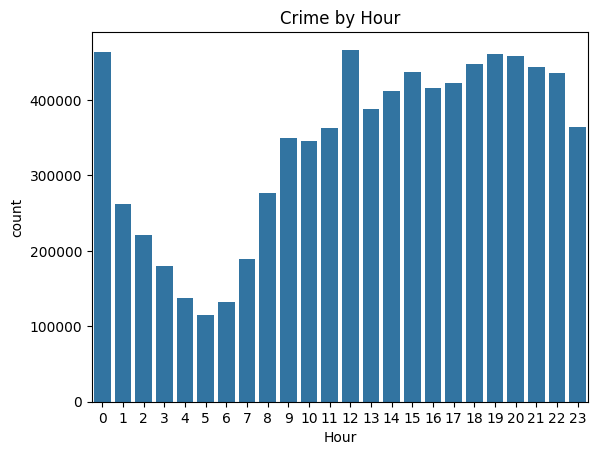

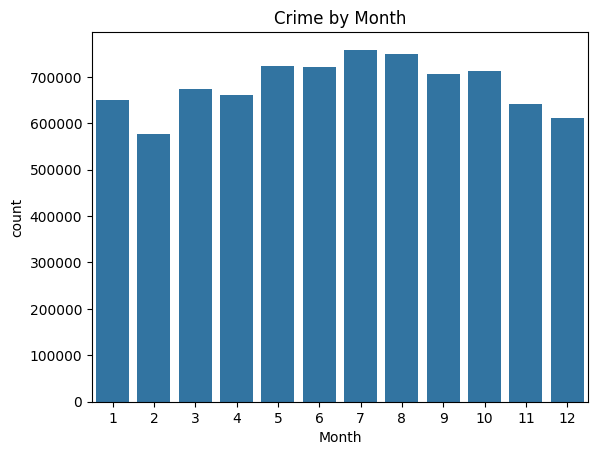

In [47]:
# 'Date' 컬럼에서 요일, 월, 시간 추출
chicago['Date'] = pd.to_datetime(chicago['Date'])
chicago['Hour'] = chicago['Date'].dt.hour
chicago['Weekday'] = chicago['Date'].dt.weekday
chicago['Month'] = chicago['Date'].dt.month

# 시간대별 범죄 발생 건수
sns.countplot(x='Hour', data=chicago)
plt.title('Crime by Hour')
plt.show()

# 월별 범죄 발생 건수
sns.countplot(x='Month', data=chicago)
plt.title('Crime by Month')
plt.show()

- 5-8월 여름에 더 범죄가 늘어나는 추이를 보임
- 더위로 인한 스트레스가 공격성과 폭력성을 높일 수 있음
- 더운 날씨로 인해 사람들이 더 많이 외출하고 활동하므로 범죄 기회가 증가
- 창문을 열어두거나 야외 활동이 늘어나면서 주거침입이나 절도의 기회가 증가
- 시카고의 5-8월 날씨
    - 6-8월: 평균 기온 22-29°C이며 습도가 높고 매우 덥습니다.
    - 특히 7월이 가장 더운 달이며 때로는 35°C 이상 올라가기도 합니다.

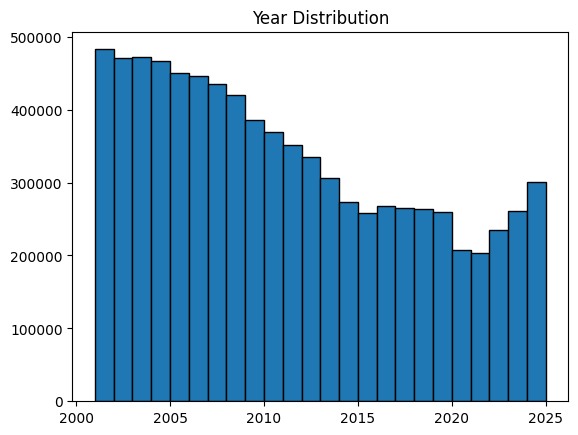

In [49]:
# 히스토그램
plt.hist(chicago['Year'], bins=range(2001, 2026), edgecolor='black')
plt.title('Year Distribution')
plt.show()

- 전체적으로 감소세를 보이다가 2022년부터 2025년 최근에 상승세를 보임

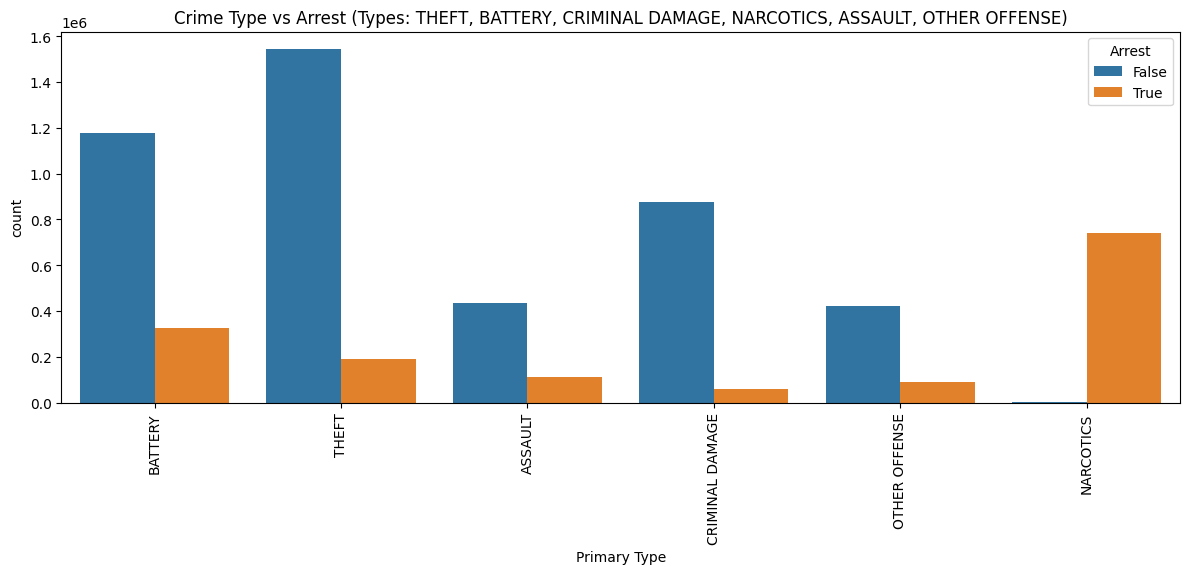

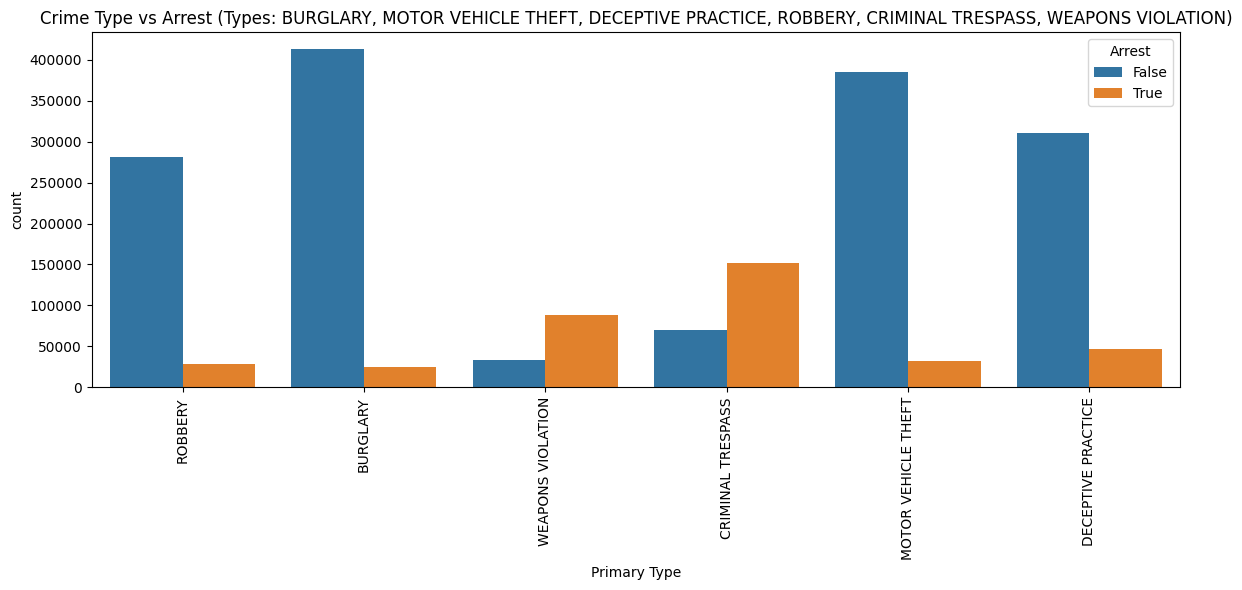

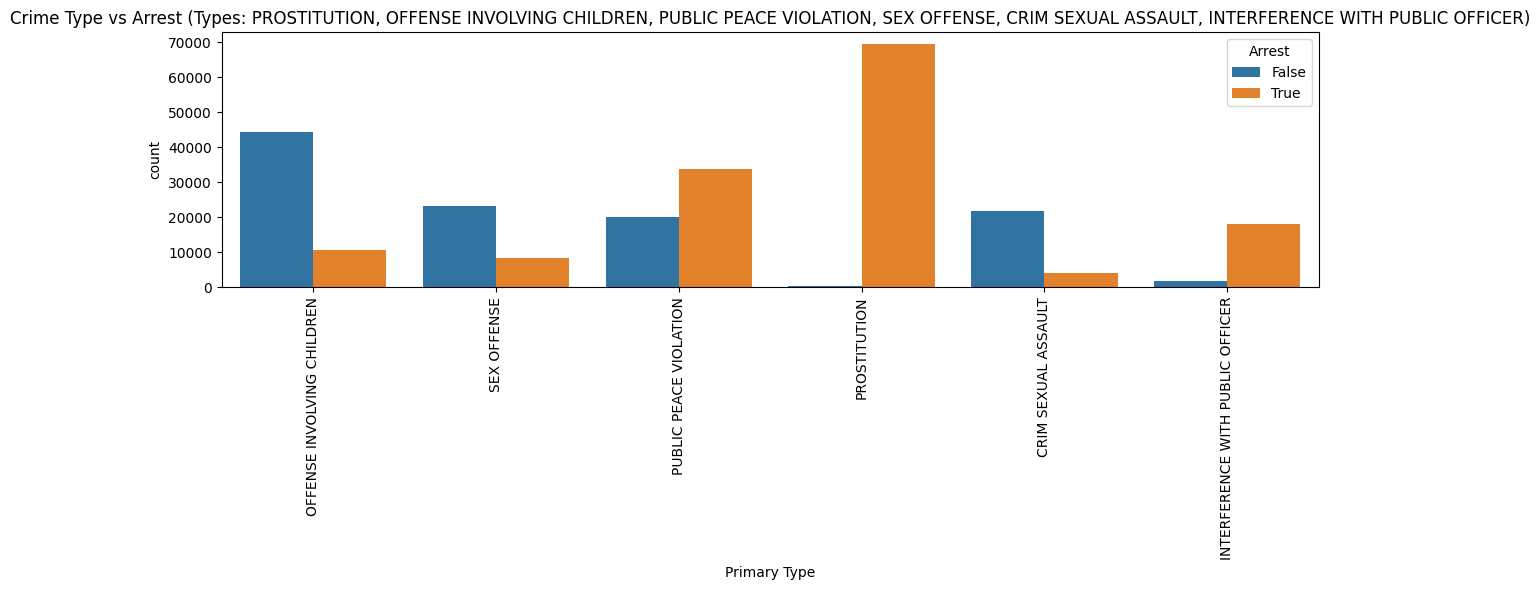

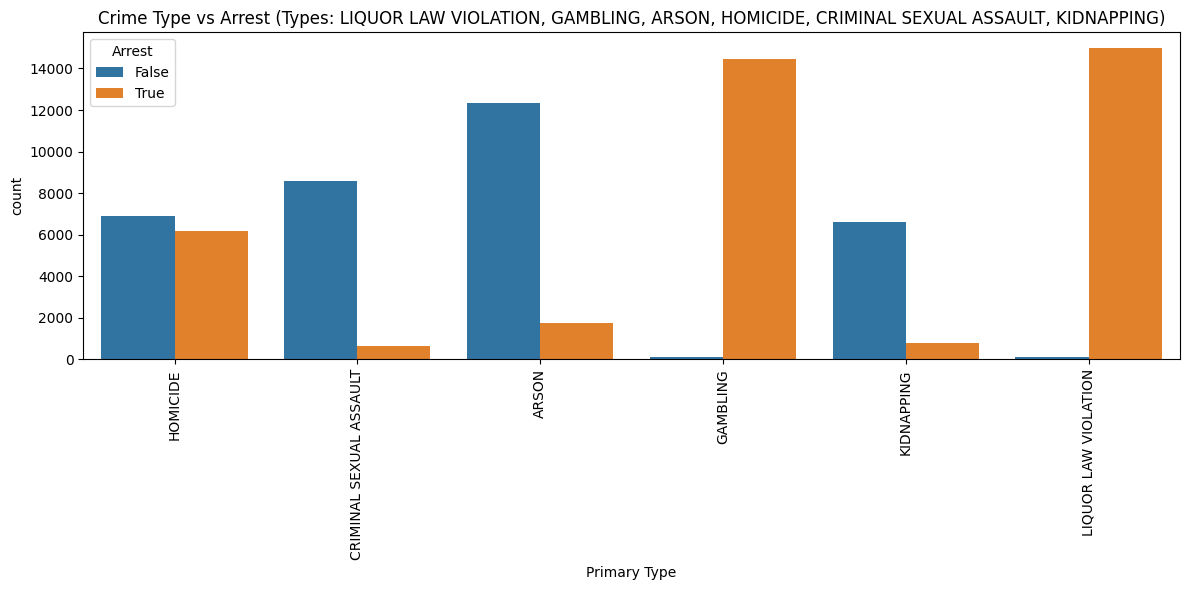

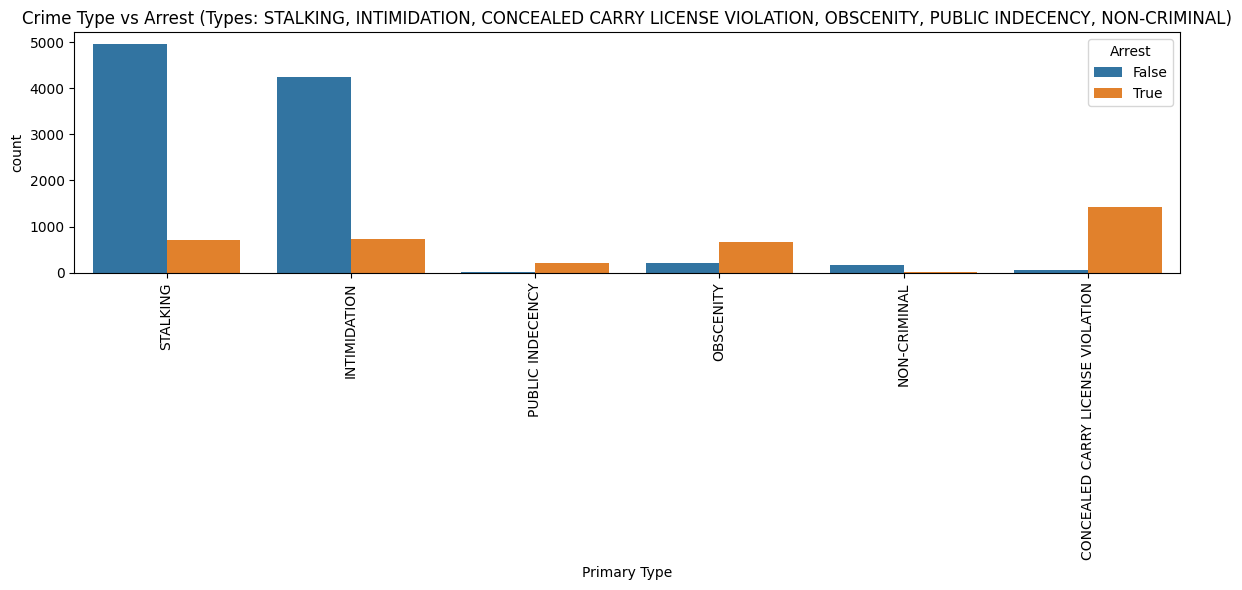

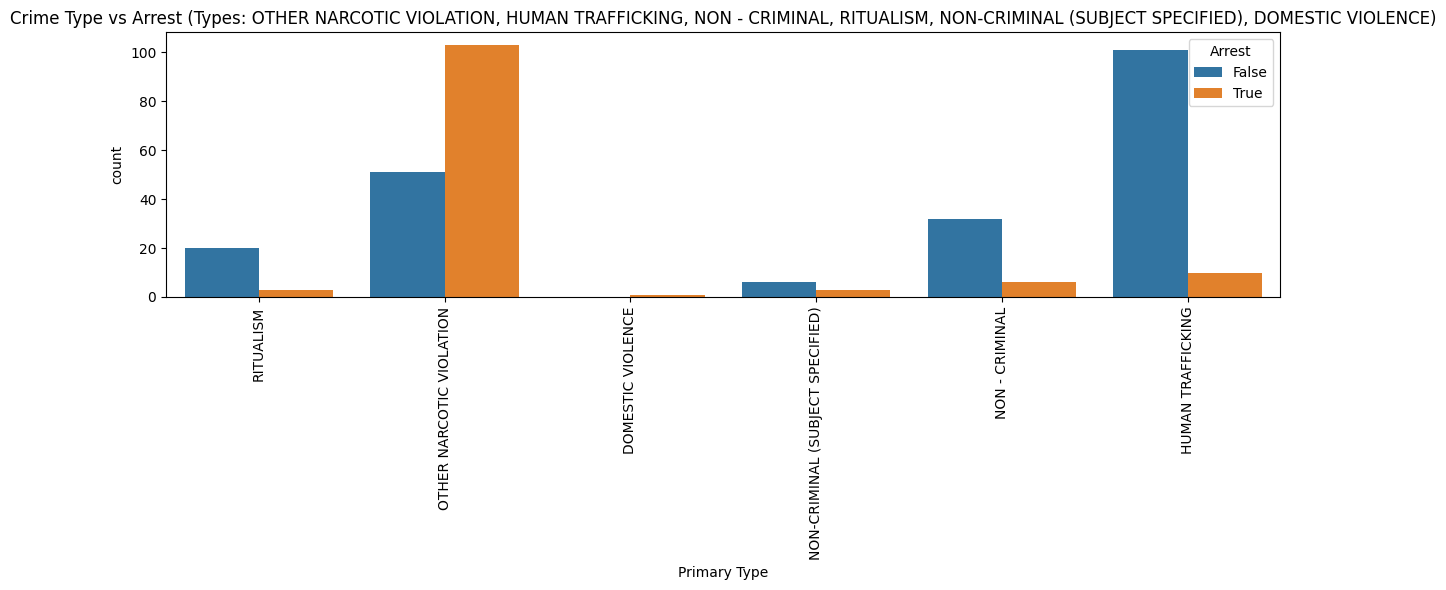

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Primary Type의 고유 값 리스트
primary_types = chicago['Primary Type'].value_counts().index

# 6개씩 나누기
chunks = [primary_types[i:i+6] for i in range(0, len(primary_types), 6)]

# 각 그룹에 대해 개별적으로 그래프 그리기
for chunk in chunks:
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    sns.countplot(x='Primary Type', hue='Arrest', data=chicago[chicago['Primary Type'].isin(chunk)])
    plt.title(f'Crime Type vs Arrest (Types: {", ".join(chunk)})')

    # x축 레이블 회전
    plt.xticks(rotation=90)

    # 레이아웃 자동 조정
    plt.tight_layout()

    plt.show()


In [54]:
# 체포율이 높을 수록 점점 해당 범죄가 감소하는지
# True(체포됨) → 1, False(체포 안됨) → 0 이므로, mean()을 취하면 체포율
arrest_rate = chicago.groupby('Primary Type')['Arrest'].mean().reset_index()
arrest_rate.rename(columns={'Arrest': 'Arrest Rate'}, inplace=True)

In [57]:
arrest_rate = arrest_rate.sort_values(by = 'Arrest Rate', ascending=False)

In [62]:
# 연도별 발생 건수
crime_trend = chicago.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime Count')

In [63]:
crime_trend.head()

,Year,Primary Type,Crime Count
0,2001,ARSON,1004
1,2001,ASSAULT,31257
2,2001,BATTERY,93041
3,2001,BURGLARY,25943
4,2001,CRIM SEXUAL ASSAULT,1742


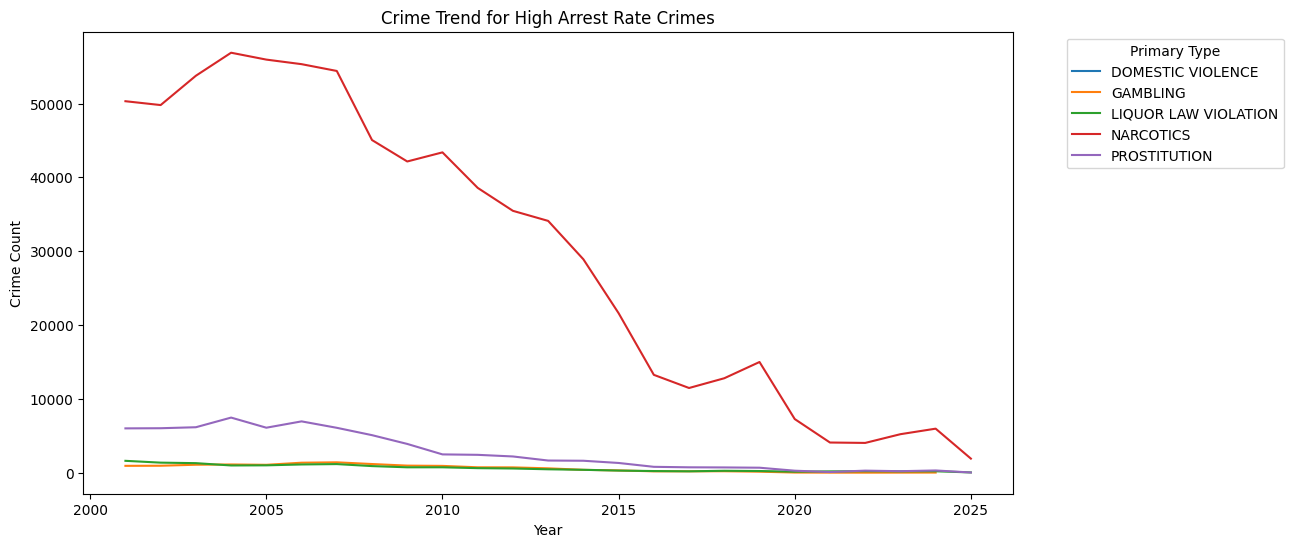

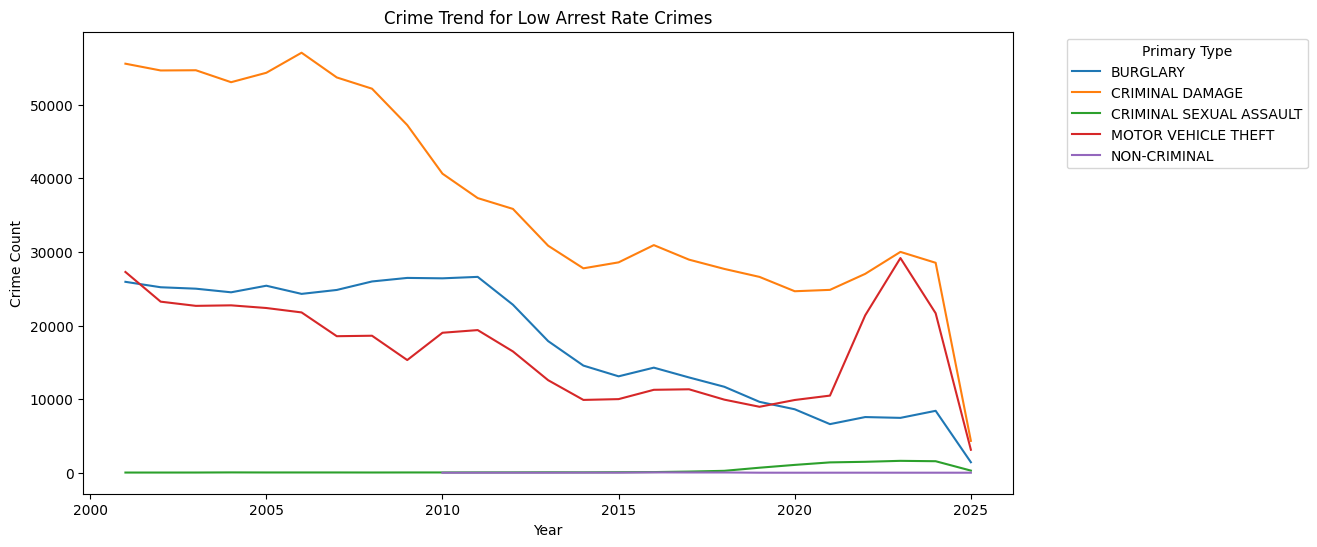

In [64]:
# 체포율이 높은 상위 5개 범죄 유형
top_arrest_types = arrest_rate.sort_values(by='Arrest Rate', ascending=False).head(5)['Primary Type']

# 체포율이 높은 범죄의 연도별 발생 추이
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Crime Count', hue='Primary Type',
             data=crime_trend[crime_trend['Primary Type'].isin(top_arrest_types)])
plt.title('Crime Trend for High Arrest Rate Crimes')
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 체포율이 낮은 하위 5개 범죄 유형
low_arrest_types = arrest_rate.sort_values(by='Arrest Rate', ascending=True).head(5)['Primary Type']

# 체포율이 낮은 범죄의 연도별 발생 추이
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Crime Count', hue='Primary Type',
             data=crime_trend[crime_trend['Primary Type'].isin(low_arrest_types)])
plt.title('Crime Trend for Low Arrest Rate Crimes')
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-> 전체적으로 감소추세이지만 체포율이 높은 항목들이 조금 더 확연하게 감소추세를 보임

- 체포율 상위 5개의 체포율 변화

In [66]:
# 연도별 + 범죄 유형별 체포율 계산
yearly_arrest_rate = chicago.groupby(['Year', 'Primary Type'])['Arrest'].mean().reset_index()
yearly_arrest_rate.rename(columns={'Arrest': 'Arrest Rate'}, inplace=True)

# 연도별 범죄 발생 건수 계산
crime_trend = chicago.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime Count')

# 체포율과 결합 (연도별로 체포율 다르게 계산)
crime_trend = crime_trend.merge(yearly_arrest_rate, on=['Year', 'Primary Type'], how='left')

# 데이터 확인
crime_trend.head()

,Year,Primary Type,Crime Count,Arrest Rate
0,2001,ARSON,1004,0.179283
1,2001,ASSAULT,31257,0.227725
2,2001,BATTERY,93041,0.219086
3,2001,BURGLARY,25943,0.064950
4,2001,CRIM SEXUAL ASSAULT,1742,0.231343


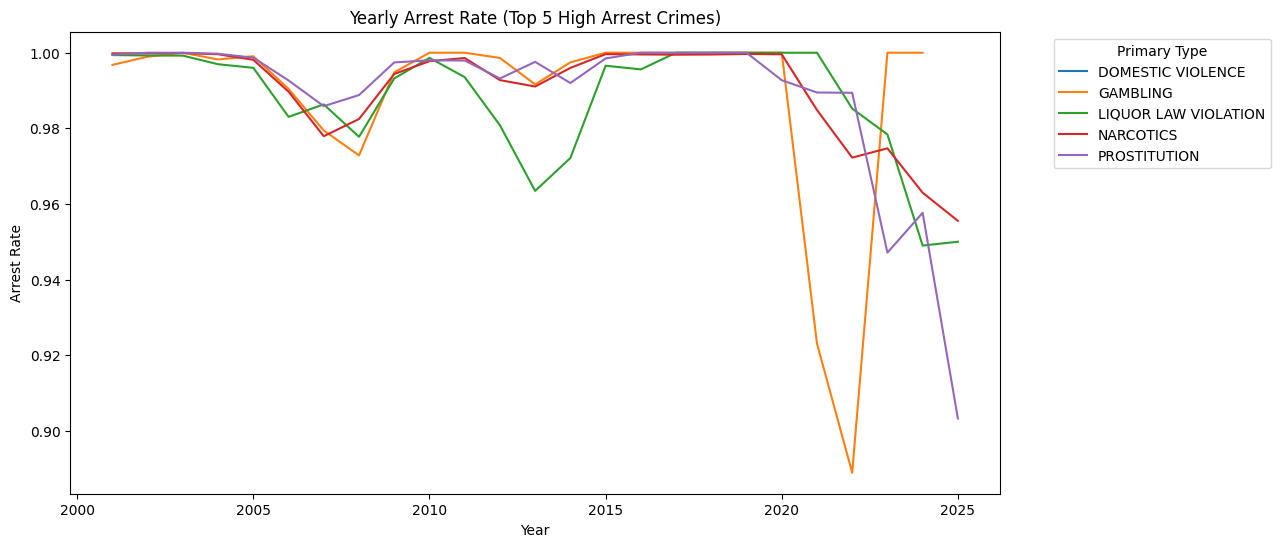

In [67]:
# 체포율이 높은 상위 5개 범죄 유형 선택
top5_arrest_types = crime_trend.groupby('Primary Type')['Arrest Rate'].mean().nlargest(5).index

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Arrest Rate', hue='Primary Type',
             data=crime_trend[crime_trend['Primary Type'].isin(top5_arrest_types)])
plt.title('Yearly Arrest Rate (Top 5 High Arrest Crimes)')
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- 각 연도별로 체포율 상위 5개 범죄 찾기

In [68]:
# 연도 리스트 가져오기
years = crime_trend['Year'].unique()
# 결과를 저장할 빈 리스트 생성
top5_arrest_by_year_list = []

# 연도별로 반복
for year in years:
    # 해당 연도의 데이터 필터링
    yearly_data = crime_trend[crime_trend['Year'] == year]

    # 체포율(Arrest Rate)이 높은 상위 5개 범죄 유형 선택
    top5_crimes = yearly_data.nlargest(5, 'Arrest Rate')

    # 리스트에 추가
    top5_arrest_by_year_list.append(top5_crimes)

# 리스트를 하나의 데이터프레임으로 변환
top5_arrest_by_year = pd.concat(top5_arrest_by_year_list).reset_index(drop=True)

# 데이터 확인
top5_arrest_by_year

,Year,Primary Type,Crime Count,Arrest Rate
0,2001,DOMESTIC VIOLENCE,1,1.000000
1,2001,OBSCENITY,19,1.000000
2,2001,OTHER NARCOTIC VIOLATION,6,1.000000
3,2001,PUBLIC INDECENCY,9,1.000000
4,2001,NARCOTICS,50314,0.999841
...,...,...,...,...
120,2025,NON-CRIMINAL,2,1.000000
121,2025,PUBLIC INDECENCY,5,1.000000
122,2025,CONCEALED CARRY LICENSE VIOLATION,69,0.985507
123,2025,NARCOTICS,1911,0.955521


### 전체 범죄 발생비율 확인

In [69]:
# 범죄 유형별 발생 건수 비율 계산
crime_ratio = chicago['Primary Type'].value_counts(normalize=True) * 100
print(crime_ratio)

Primary Type
THEFT                                21.176028
BATTERY                              18.349177
CRIMINAL DAMAGE                      11.446735
NARCOTICS                             9.120098
ASSAULT                               6.701872
OTHER OFFENSE                         6.240241
BURGLARY                              5.346277
MOTOR VEHICLE THEFT                   5.095242
DECEPTIVE PRACTICE                    4.366405
ROBBERY                               3.779500
CRIMINAL TRESPASS                     2.717272
WEAPONS VIOLATION                     1.477253
PROSTITUTION                          0.850337
OFFENSE INVOLVING CHILDREN            0.672753
PUBLIC PEACE VIOLATION                0.657975
SEX OFFENSE                           0.382550
CRIM SEXUAL ASSAULT                   0.316108
INTERFERENCE WITH PUBLIC OFFICER      0.239518
LIQUOR LAW VIOLATION                  0.184741
GAMBLING                              0.177767
ARSON                                 0.172197


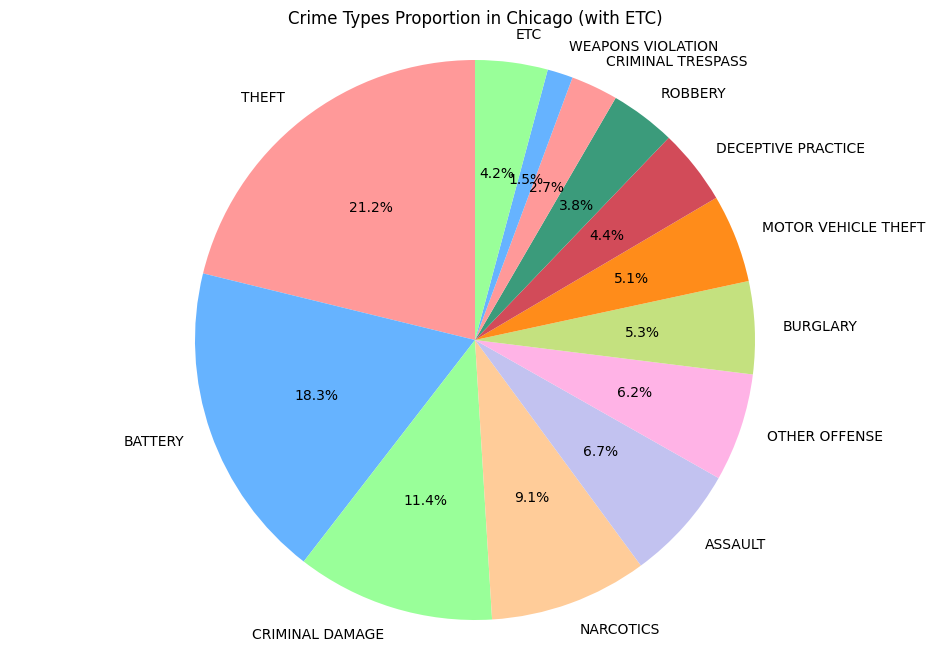

In [72]:
# 0.9% 이하의 범죄를 "ETC"
threshold = 0.9  # 1% 이하를 묶을 기준
crime_ratio_etc = crime_ratio[crime_ratio > threshold]
crime_ratio_etc['ETC'] = crime_ratio[crime_ratio <= threshold].sum()

# 파이 차트 그리기
plt.figure(figsize=(12, 8))
# 색상 목록
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#ff8c1a', '#d24b59', '#3b9b7b']
plt.pie(crime_ratio_etc, labels=crime_ratio_etc.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Crime Types Proportion in Chicago (with ETC)')
plt.axis('equal')  # 원형 유지
plt.show()

- 범죄 발생률이 제일 높은 THEFT의 년도별 추이와 체포율

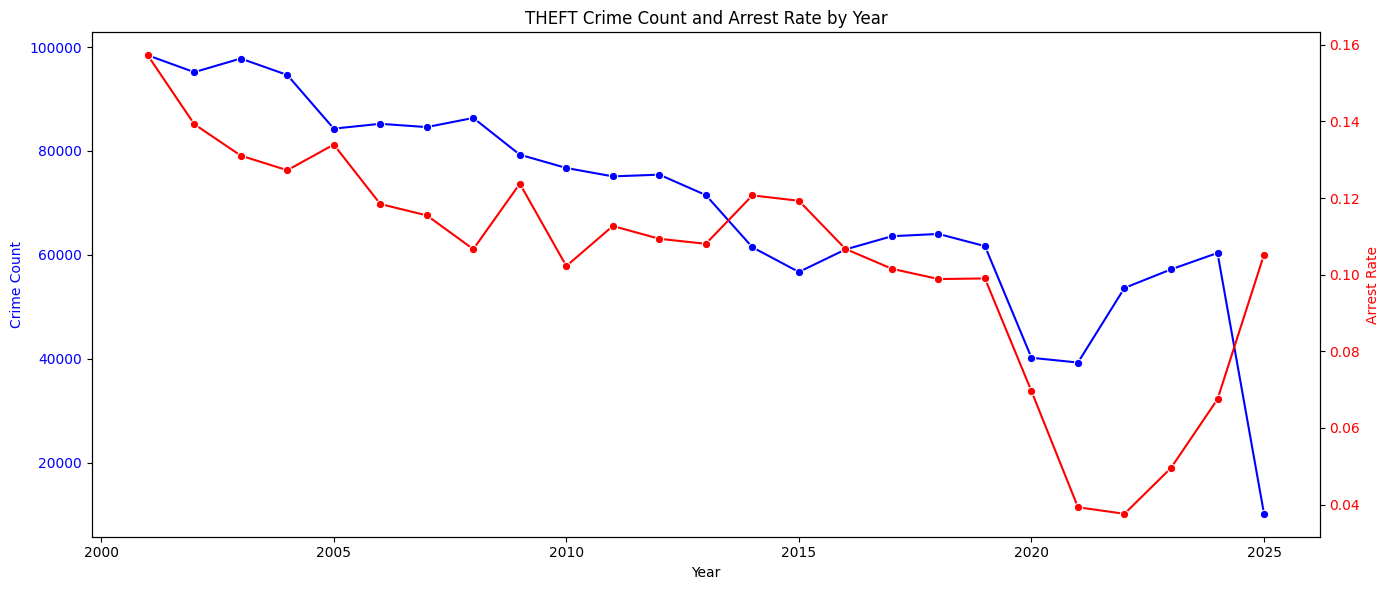

In [74]:

# THEFT 범죄 데이터 필터링
theft_data = chicago[chicago['Primary Type'] == 'THEFT']

# 1. THEFT 범죄의 년도별 발생 건수 추이
theft_yearly_count = theft_data.groupby('Year').size().reset_index(name='Crime Count')

# 2. THEFT 범죄의 년도별 체포율 (Arrest Rate)
theft_yearly_arrest_rate = theft_data.groupby('Year')['Arrest'].mean().reset_index()
theft_yearly_arrest_rate.rename(columns={'Arrest': 'Arrest Rate'}, inplace=True)

# 그래프 그리기 (두 축을 사용하여 겹쳐서 시각화)
fig, ax1 = plt.subplots(figsize=(14, 6))

# 1. THEFT 범죄의 년도별 발생 건수 추이
sns.lineplot(x='Year', y='Crime Count', data=theft_yearly_count, ax=ax1, marker='o', color='blue')
ax1.set_title('THEFT Crime Count and Arrest Rate by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crime Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 2. THEFT 범죄의 년도별 체포율
ax2 = ax1.twinx()  # 두 번째 y축 생성
sns.lineplot(x='Year', y='Arrest Rate', data=theft_yearly_arrest_rate, ax=ax2, marker='o', color='red')
ax2.set_ylabel('Arrest Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()  # 레이아웃 조정
plt.show()


- 주거지역 별 범죄 발생률(Location Description)

In [75]:
location_crime_count = chicago['Location Description'].value_counts()

In [76]:
location_crime_top5 = location_crime_count.sort_values(ascending=False).head(5)

<ipython-input-77-e4d64181b8b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_location_crime['Rank'] = top_5_location_crime.groupby('Location Description')['Crime Count'].rank(method='first', ascending=False)
<ipython-input-77-e4d64181b8b3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crime Count', y='Primary Type', data=data, ax=ax, palette='viridis')
<ipython-input-77-e4d64181b8b3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

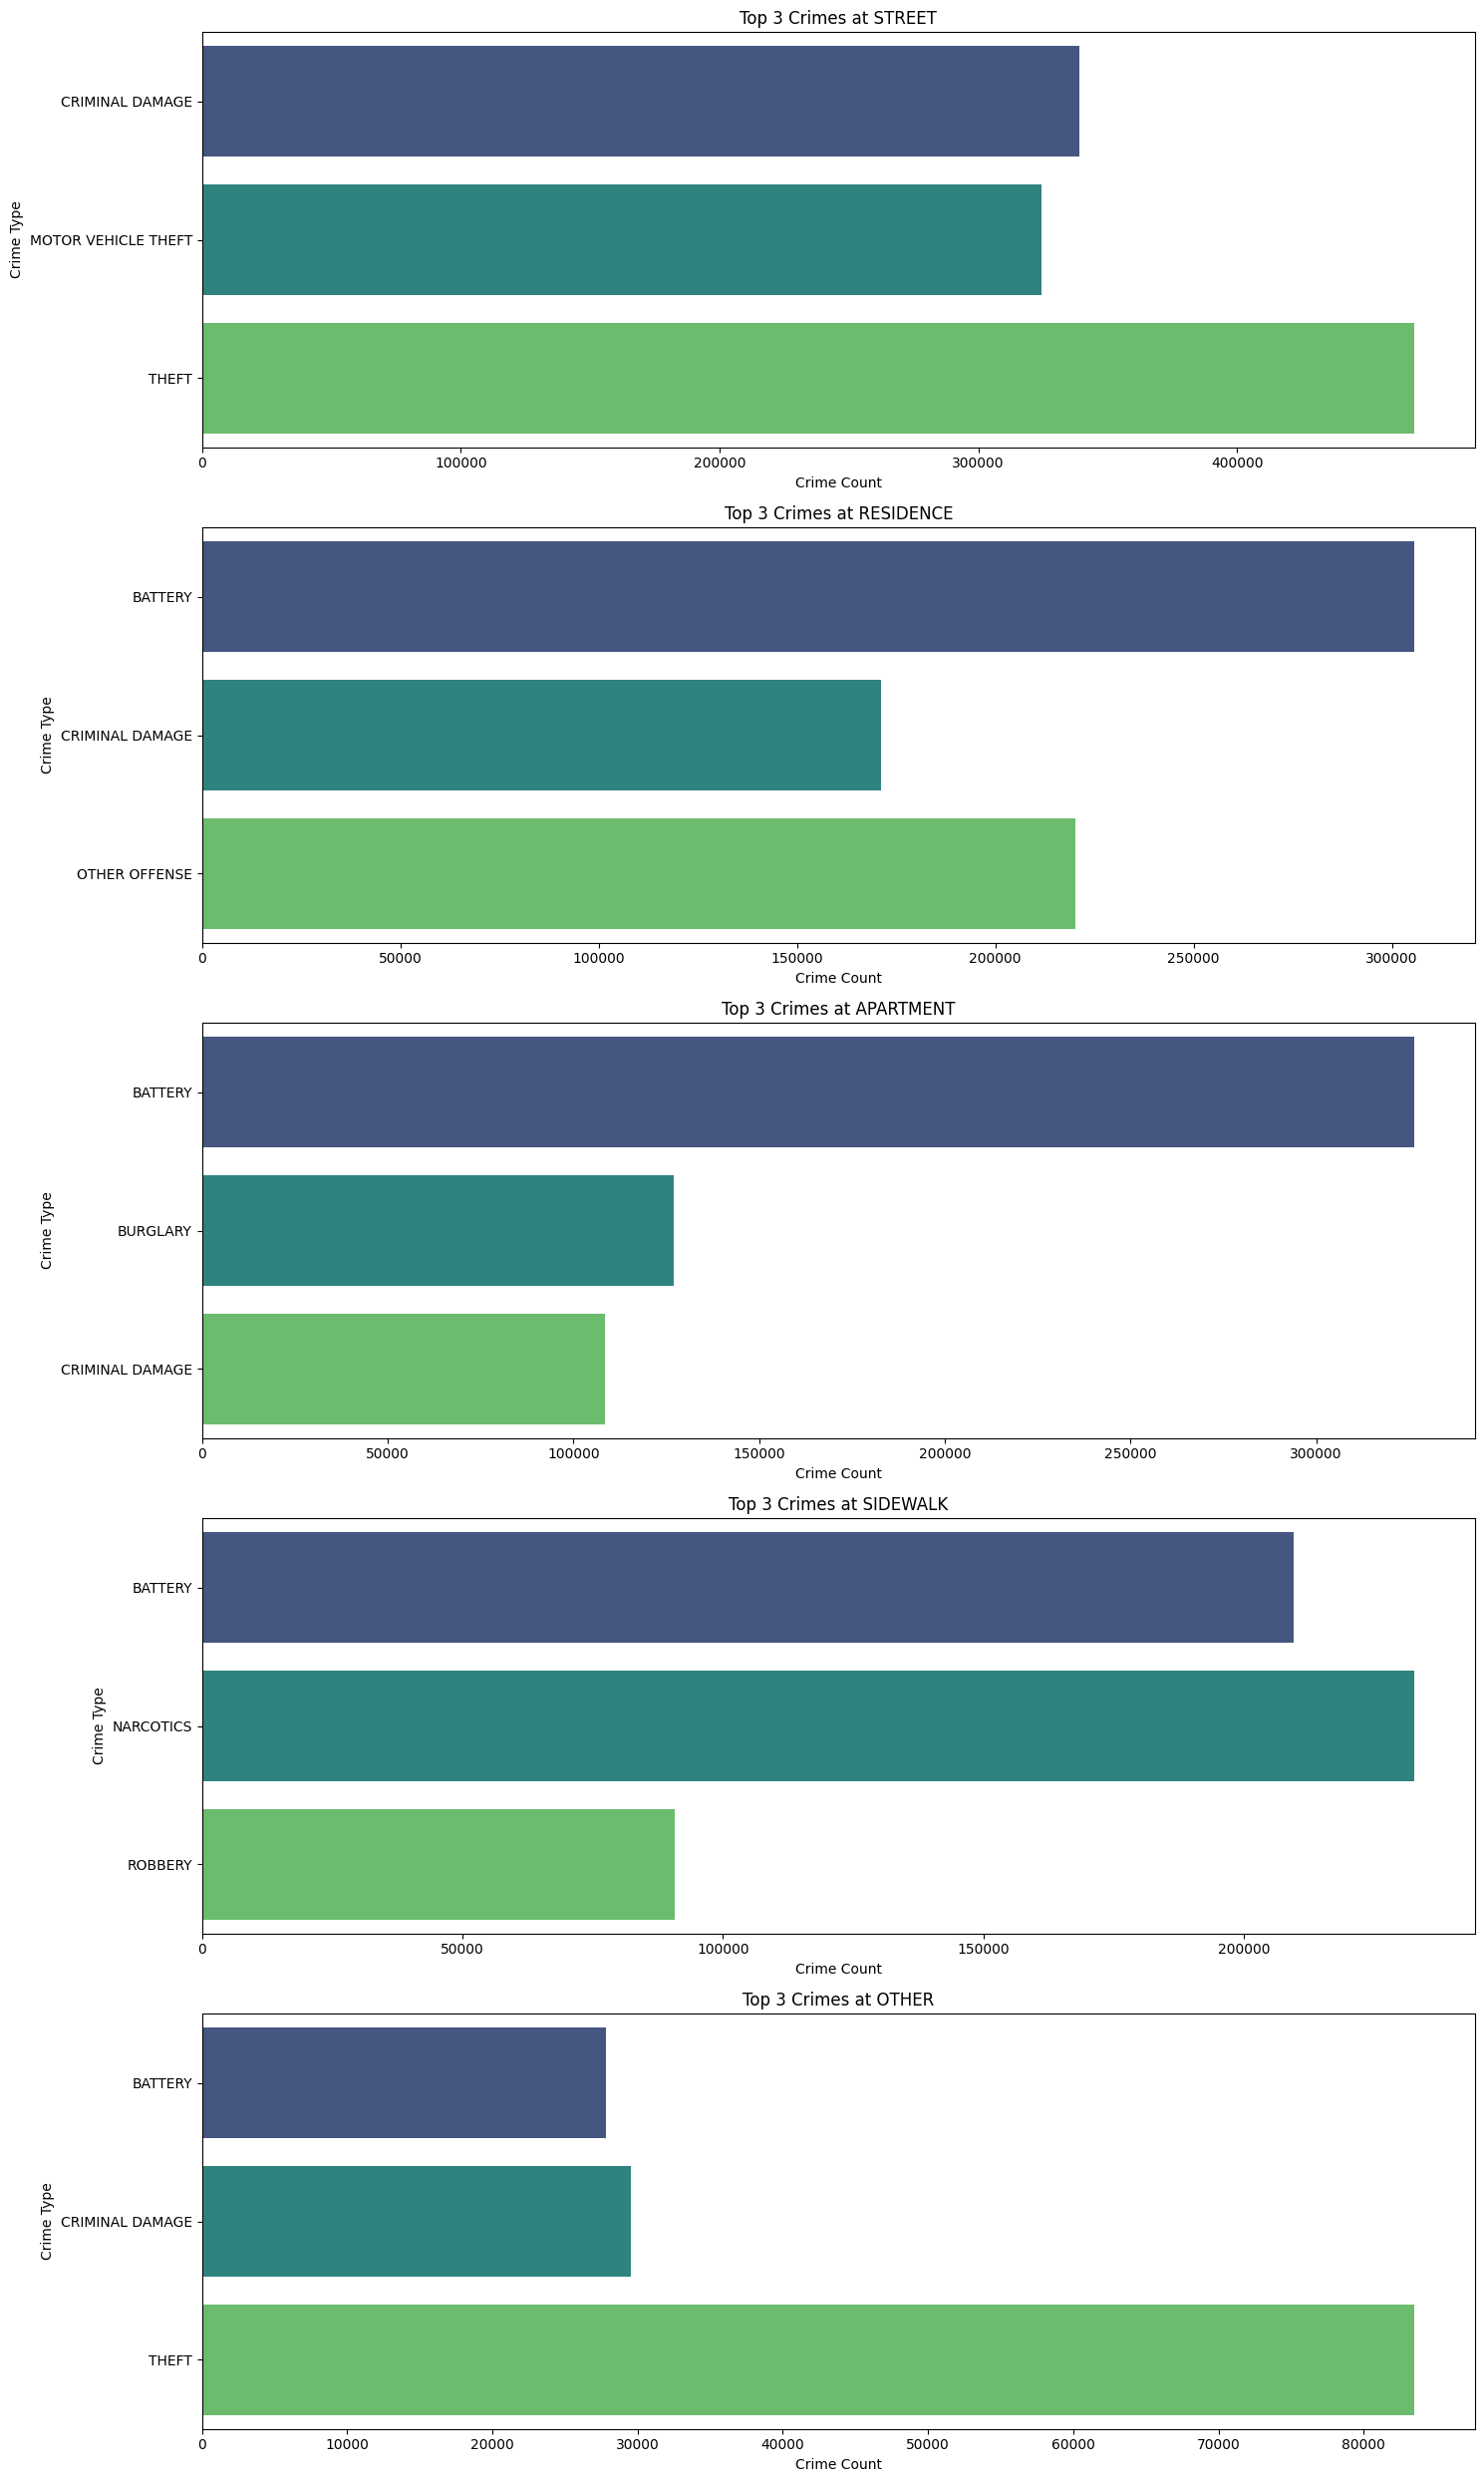

In [77]:
# 1. 상위 5개 주거지역만 추출
top_5_locations = location_crime_top5.index

# 2. 주거지역별 범죄 발생 건수와 범죄 유형 집계
location_crime_detail = chicago.groupby(['Location Description', 'Primary Type']).size().reset_index(name='Crime Count')

# 3. 상위 5 주거지역에 대해서만 필터링
top_5_location_crime = location_crime_detail[location_crime_detail['Location Description'].isin(top_5_locations)]

# 4. 주거지역별로 범죄 발생 건수를 내림차순 정렬하고 Rank 부여
top_5_location_crime['Rank'] = top_5_location_crime.groupby('Location Description')['Crime Count'].rank(method='first', ascending=False)

# 5. Rank가 1~3인 경우만 필터링 (상위 3개 범죄)
top_3_crimes_by_location = top_5_location_crime[top_5_location_crime['Rank'] <= 3]

# 6. 시각화 (주거 지역별로 subplot을 나눠서 상위 3개 범죄 유형을 표시)
num_locations = len(top_5_locations)
fig, axes = plt.subplots(num_locations, 1, figsize=(15, 5 * num_locations))

# 각 주거지역에 대해 subplot을 생성
for i, location in enumerate(top_5_locations):
    ax = axes[i] if num_locations > 1 else axes  # 여러 개의 subplot일 경우 인덱스로 접근
    data = top_3_crimes_by_location[top_3_crimes_by_location['Location Description'] == location]

    sns.barplot(x='Crime Count', y='Primary Type', data=data, ax=ax, palette='viridis')
    ax.set_title(f'Top 3 Crimes at {location}')
    ax.set_xlabel('Crime Count')
    ax.set_ylabel('Crime Type')

plt.tight_layout()
plt.show()


In [78]:
# 6. 주거지역별로 상위 3개 범죄를 하나의 표로 만들기
top_3_crimes_pivot = top_3_crimes_by_location.pivot_table(index='Location Description',
                                                         columns='Rank',
                                                         values='Primary Type',
                                                         aggfunc='first')

# 7. 결과 출력
top_3_crimes_pivot.columns = [f'Crime {i}' for i in range(1, 4)]  # 열 이름을 Crime 1, Crime 2, Crime 3으로 변경
top_3_crimes_pivot = top_3_crimes_pivot.reset_index()  # Index를 초기화하여 보기 좋게 정리

# 출력
print(top_3_crimes_pivot)


  Location Description    Crime 1          Crime 2              Crime 3
0            APARTMENT    BATTERY         BURGLARY      CRIMINAL DAMAGE
1                OTHER      THEFT  CRIMINAL DAMAGE              BATTERY
2            RESIDENCE    BATTERY    OTHER OFFENSE      CRIMINAL DAMAGE
3             SIDEWALK  NARCOTICS          BATTERY              ROBBERY
4               STREET      THEFT  CRIMINAL DAMAGE  MOTOR VEHICLE THEFT


### 체포율

In [79]:
# 전체 범죄에서 체포가 발생한 건수
total_crimes = chicago.shape[0]

# 체포가 발생한 범죄의 건수
arrested_crimes = chicago[chicago['Arrest'] == True].shape[0]

# 체포 비율 계산
arrest_rate = arrested_crimes / total_crimes * 100

# 결과 출력
print(f"전체 범죄 중 {arrest_rate:.2f}%가 체포로 이어졌습니다.")


전체 범죄 중 25.42%가 체포로 이어졌습니다.


In [80]:
# 범죄 유형별 체포율 계산
crime_arrest_rate = chicago.groupby('Primary Type')['Arrest'].mean().reset_index()

# 체포율이 낮은 범죄 유형 Top 5
low_arrest_rate = crime_arrest_rate.sort_values(by='Arrest', ascending=True).head(5)

# 체포율이 높은 범죄 유형 Top 5
high_arrest_rate = crime_arrest_rate.sort_values(by='Arrest', ascending=False).head(5)

# 결과 출력
print("체포율이 낮은 범죄 유형 Top 5:")
print(low_arrest_rate)

print("\n체포율이 높은 범죄 유형 Top 5:")
print(high_arrest_rate)


체포율이 낮은 범죄 유형 Top 5:
               Primary Type    Arrest
3                  BURGLARY  0.057160
6           CRIMINAL DAMAGE  0.065408
7   CRIMINAL SEXUAL ASSAULT  0.067506
18      MOTOR VEHICLE THEFT  0.076616
21             NON-CRIMINAL  0.088889

체포율이 높은 범죄 유형 Top 5:
            Primary Type    Arrest
10     DOMESTIC VIOLENCE  1.000000
27          PROSTITUTION  0.995777
19             NARCOTICS  0.994077
11              GAMBLING  0.993473
17  LIQUOR LAW VIOLATION  0.991075


### Community Area 별 분석

- community area 별 빈도 분석

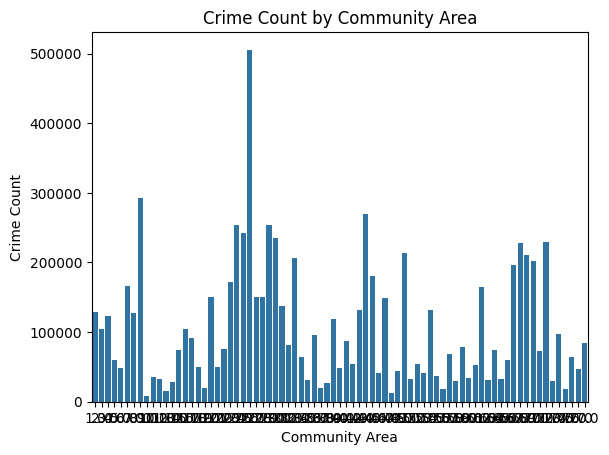

In [84]:
crime_by_area = chicago.groupby('Community Area').size().reset_index(name='Crime Count')
sns.barplot(x='Community Area', y='Crime Count', data=crime_by_area)
plt.title('Crime Count by Community Area')
plt.show()

#### community area 별 crime count top5와 bottom5 비교

In [87]:
comunityarea_crime_top_5= crime_by_area.sort_values(by='Crime Count', ascending=False).head(5)
comunityarea_crime_top_5

,Community Area,Crime Count
24,25.0,505437
7,8.0,293093
42,43.0,269135
22,23.0,254262
27,28.0,253984


In [88]:
comunityarea_crime_bottom_5= crime_by_area.sort_values(by='Crime Count', ascending=False).tail(5)
comunityarea_crime_bottom_5

,Community Area,Crime Count
54,55.0,18461
73,74.0,18282
11,12.0,15145
46,47.0,12071
8,9.0,8168


##### 1. 인구 비교

In [89]:
c_name.columns

Index(['Community Area', 'name', 'population', 'income', 'requests', 'latinos',
       'blacks', 'white', 'asian', 'other'],
      dtype='object')

In [92]:
comunityarea_crime_top_5['Community Area'] = comunityarea_crime_top_5['Community Area'].astype(int)
# 'Community Area' 컬럼을 모두 문자열로 변환
comunityarea_crime_top_5['Community Area'] = comunityarea_crime_top_5['Community Area'].astype(str)
c_name['Community Area'] = c_name['Community Area'].astype(str)

In [95]:
merge_top5 = pd.merge(comunityarea_crime_top_5, c_name, how='left', on='Community Area')

In [96]:
merge_top5.head()

,Community Area,Crime Count,name,population,income,requests,latinos,blacks,white,asian,other
0,25,505437,Austin,98514,32358,5008.019165,0.089,0.851,0.044,0.006,0.010
1,8,293093,Near North Side,80484,76290,1717.608469,0.049,0.108,0.721,0.101,0.020
2,43,269135,South Shore,52010,27903,3756.393001,0.017,0.949,0.014,0.002,0.018
3,23,254262,Humboldt Park,56323,29605,4942.208334,0.533,0.409,0.044,0.004,0.009
4,28,253984,Near West Side,54881,62770,3854.157176,0.092,0.315,0.420,0.146,0.027


In [97]:
comunityarea_crime_bottom_5['Community Area'] = comunityarea_crime_bottom_5['Community Area'].astype(int)
comunityarea_crime_bottom_5['Community Area'] = comunityarea_crime_bottom_5['Community Area'].astype(str)
merge_bottom5 = pd.merge(comunityarea_crime_bottom_5, c_name, how='left', on='Community Area')
merge_bottom5

,Community Area,Crime Count,name,population,income,requests,latinos,blacks,white,asian,other
0,55,18461,Hegewisch,9426,49924,6153.193295,0.496,0.039,0.449,0.005,0.011
1,74,18282,Mount Greenwood,19093,80505,4357.617975,0.072,0.052,0.860,0.007,0.010
2,12,15145,Forest Glen,18508,87394,5237.194727,0.115,0.007,0.746,0.107,0.024
3,47,12071,Burnside,2916,32553,6063.100137,0.007,0.977,0.007,0.000,0.010
4,9,8168,Edison Park,11187,77678,4754.625905,0.078,0.003,0.884,0.024,0.012


-> 인구수에 따라 커뮤티니지역의 사건발생건수가 차이나는 것을 알 수 있음

#### 범죄 발생 비율: 각 Community Area별 인구수에 비례해 범죄 발생률 계산

- crime_by_area 별 인구수를 보기 위해 merge

In [98]:
crime_by_area['Community Area'] = crime_by_area['Community Area'].astype(int)
crime_by_area['Community Area'] = crime_by_area['Community Area'].astype(str)
merge_crime_by_area = pd.merge(crime_by_area, c_name, how='left', on='Community Area')
merge_crime_by_area.head()

,Community Area,Crime Count,name,population,income,requests,latinos,blacks,white,asian,other
0,1,128335,Rogers Park,54991,39482,3204.888073,0.244,0.263,0.393,0.064,0.036
1,2,104796,West Ridge,71942,47323,3906.341219,0.204,0.111,0.427,0.225,0.032
2,3,123430,Uptown,56362,40324,2164.046698,0.142,0.200,0.516,0.114,0.028
3,4,59407,Lincoln Square,39493,57749,3827.260527,0.191,0.038,0.631,0.111,0.029
4,5,49041,North Center,31867,81524,5307.998870,0.136,0.023,0.773,0.045,0.022


In [101]:
# Crime Rate가 높은 순으로 정렬하여 표시
merge_crime_by_area['Crime Rate'] = merge_crime_by_area['Crime Count'] / merge_crime_by_area['population']
crime_rate_table = merge_crime_by_area[['Community Area', 'Crime Count', 'population', 'Crime Rate']].sort_values(by='Crime Rate', ascending=False)

# 표 출력
print(crime_rate_table)

   Community Area  Crime Count  population  Crime Rate
36             37        27261        2876    9.478790
25             26       149883       18001    8.326371
39             40        86793       11717    7.407442
26             27       150442       20567    7.314727
31             32       206199       29283    7.041594
..            ...          ...         ...         ...
16             17        50524       41932    1.204903
9              10        35798       37023    0.966912
73             74        18282       19093    0.957524
11             12        15145       18508    0.818295
8               9         8168       11187    0.730133

[77 rows x 4 columns]


#### 범죄 유형별 분석
Community Area별로 범죄 유형이 어떻게 분포하는지<br>
특정 지역에서 폭력 범죄나 재산 범죄가 두드러지는지 살펴볼 수 있습니다.

In [106]:
crime_by_type_area = chicago.groupby(['Community Area', 'Primary Type']).size().reset_index(name='Crime Count')

In [110]:
# 상위 3개 범죄 유형 추출 함수
top_3_crimes = crime_by_type_area.groupby('Community Area').apply(lambda x: x.nlargest(3, 'Crime Count')).reset_index(drop=True)

# 결과 출력
print(top_3_crimes)

    Community Area        Primary Type  Crime Count
0                1               THEFT        28574
1                1             BATTERY        23952
2                1     CRIMINAL DAMAGE        15310
3               10               THEFT         9256
4               10     CRIMINAL DAMAGE         5878
..             ...                 ...          ...
226              8             BATTERY        38828
227              8  DECEPTIVE PRACTICE        28587
228              9               THEFT         1762
229              9     CRIMINAL DAMAGE         1547
230              9             BATTERY         1314

[231 rows x 3 columns]


<ipython-input-110-35d5ecef8148>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_crimes = crime_by_type_area.groupby('Community Area').apply(lambda x: x.nlargest(3, 'Crime Count')).reset_index(drop=True)


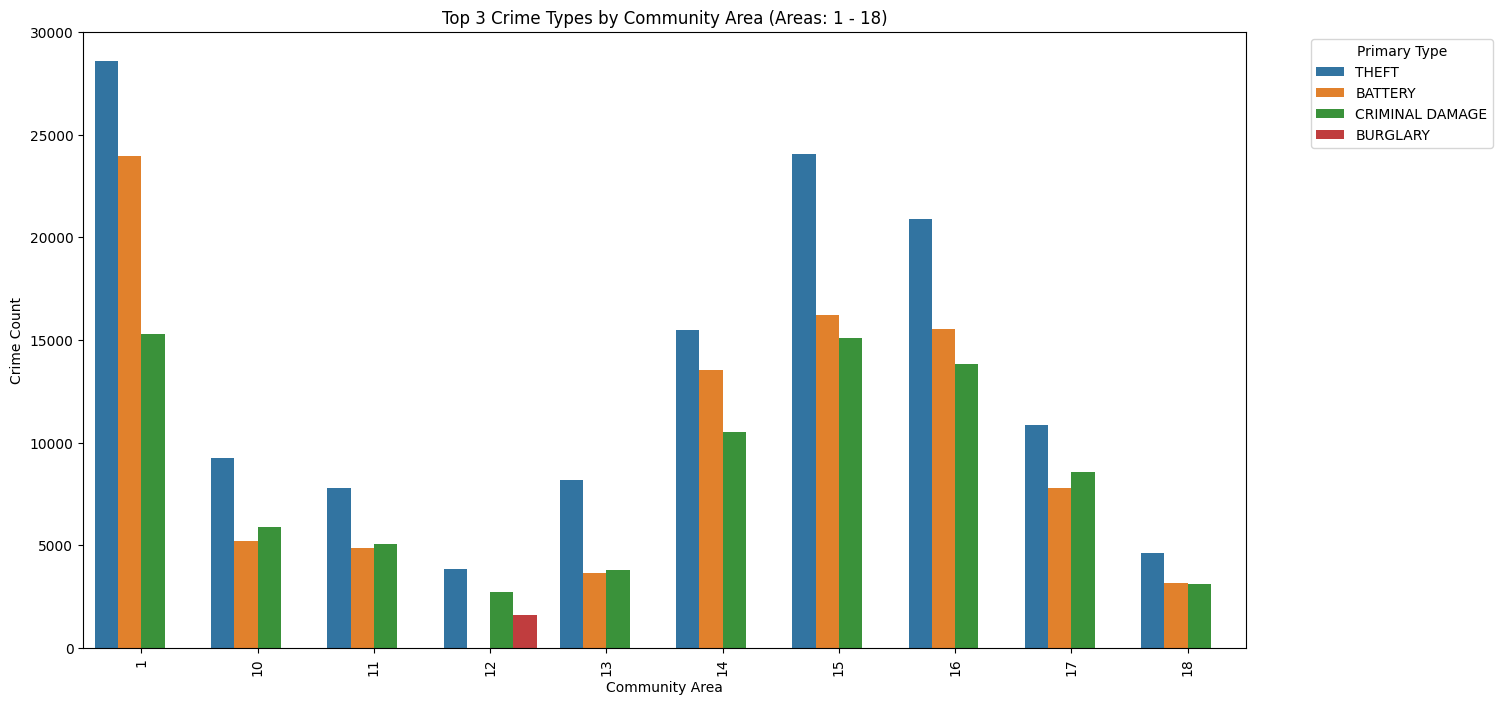

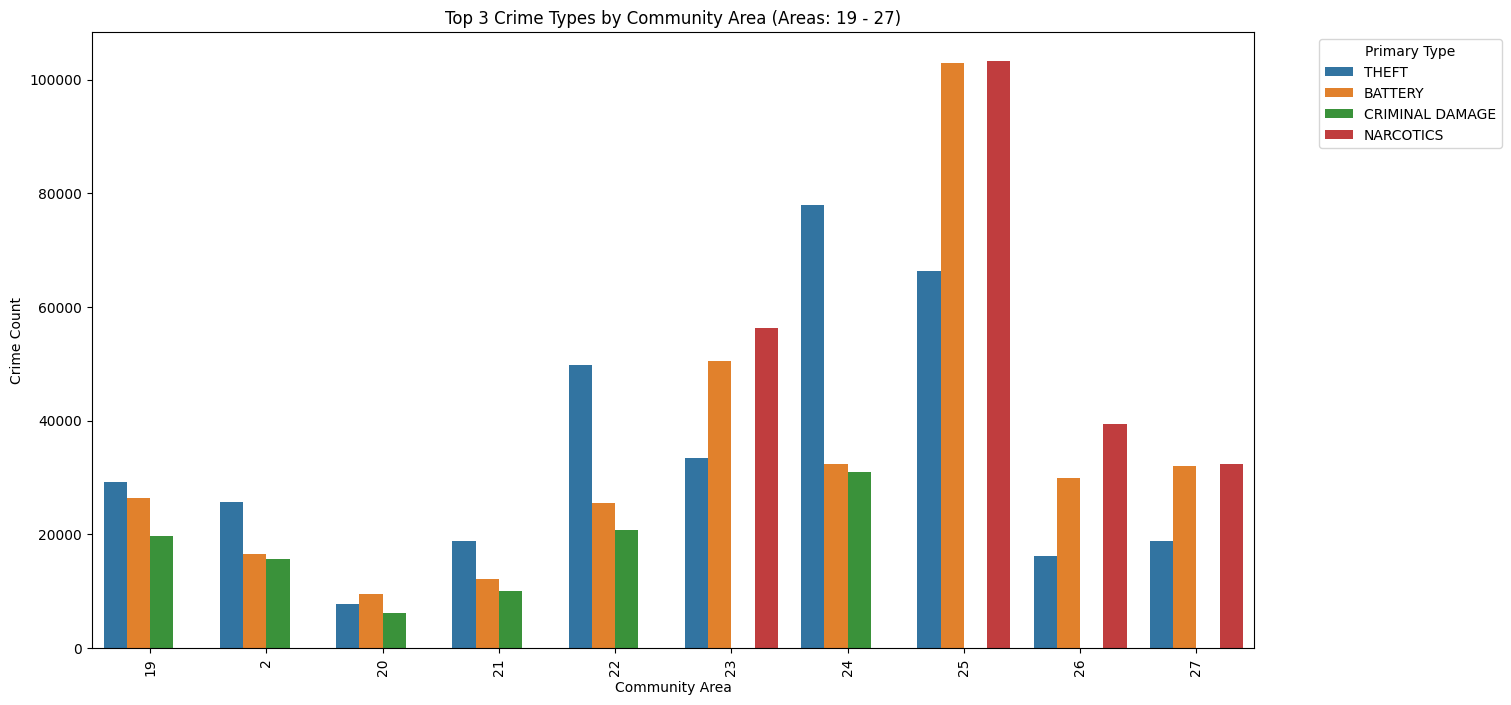

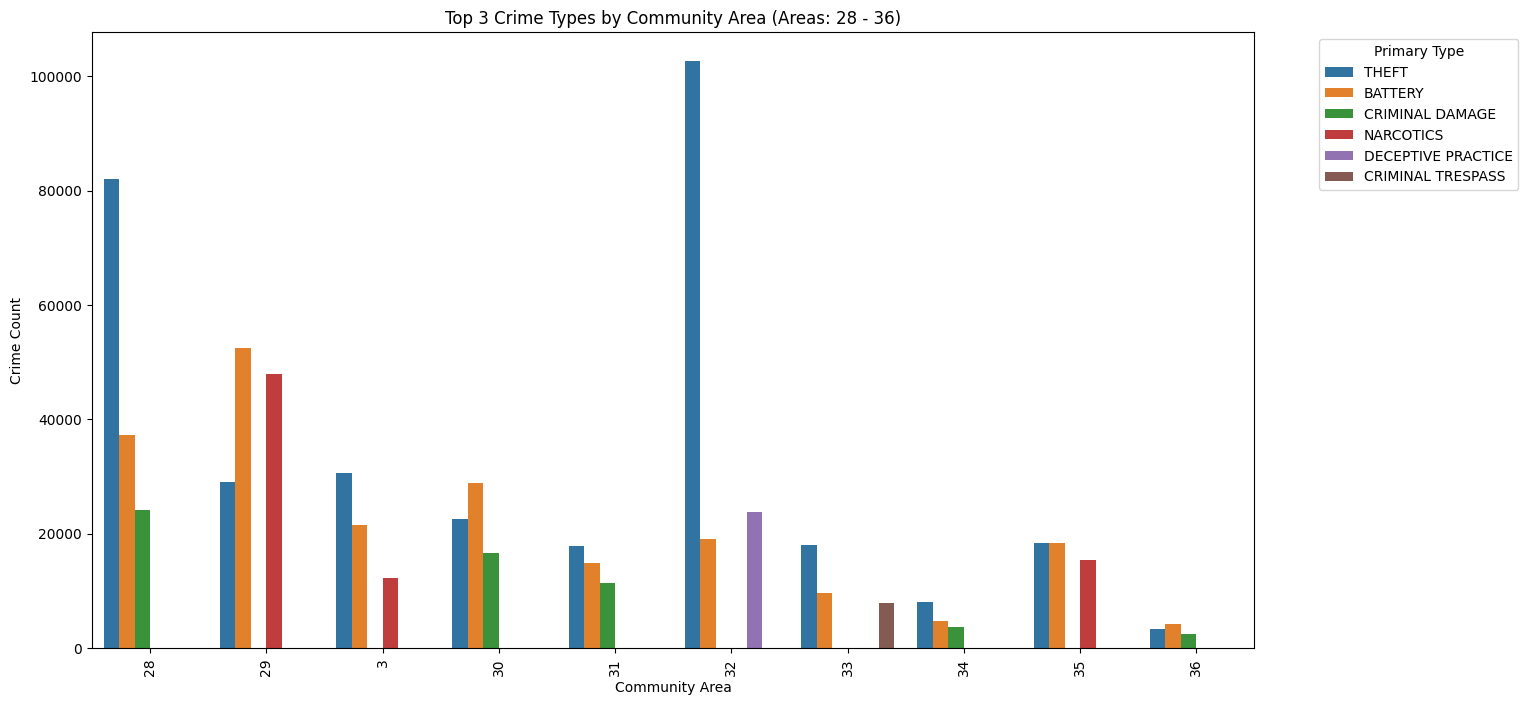

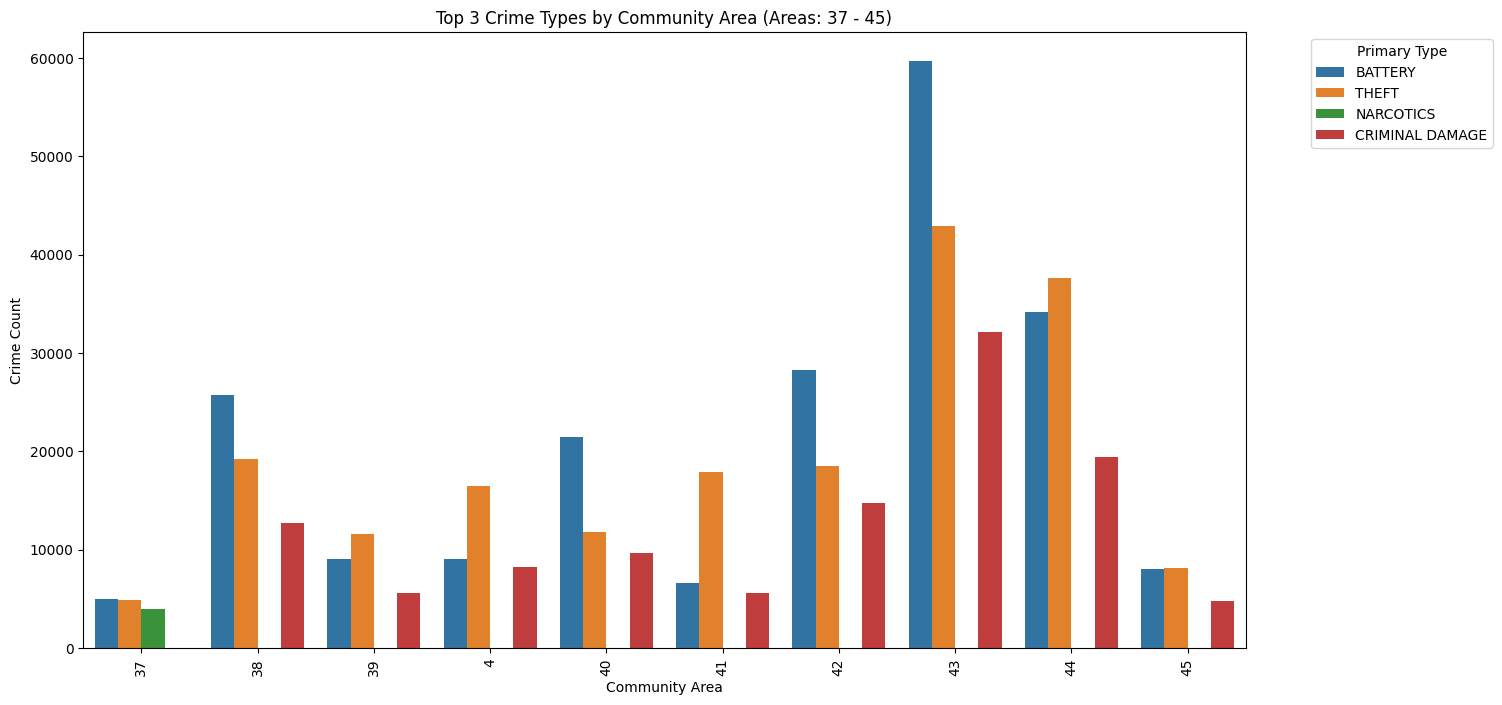

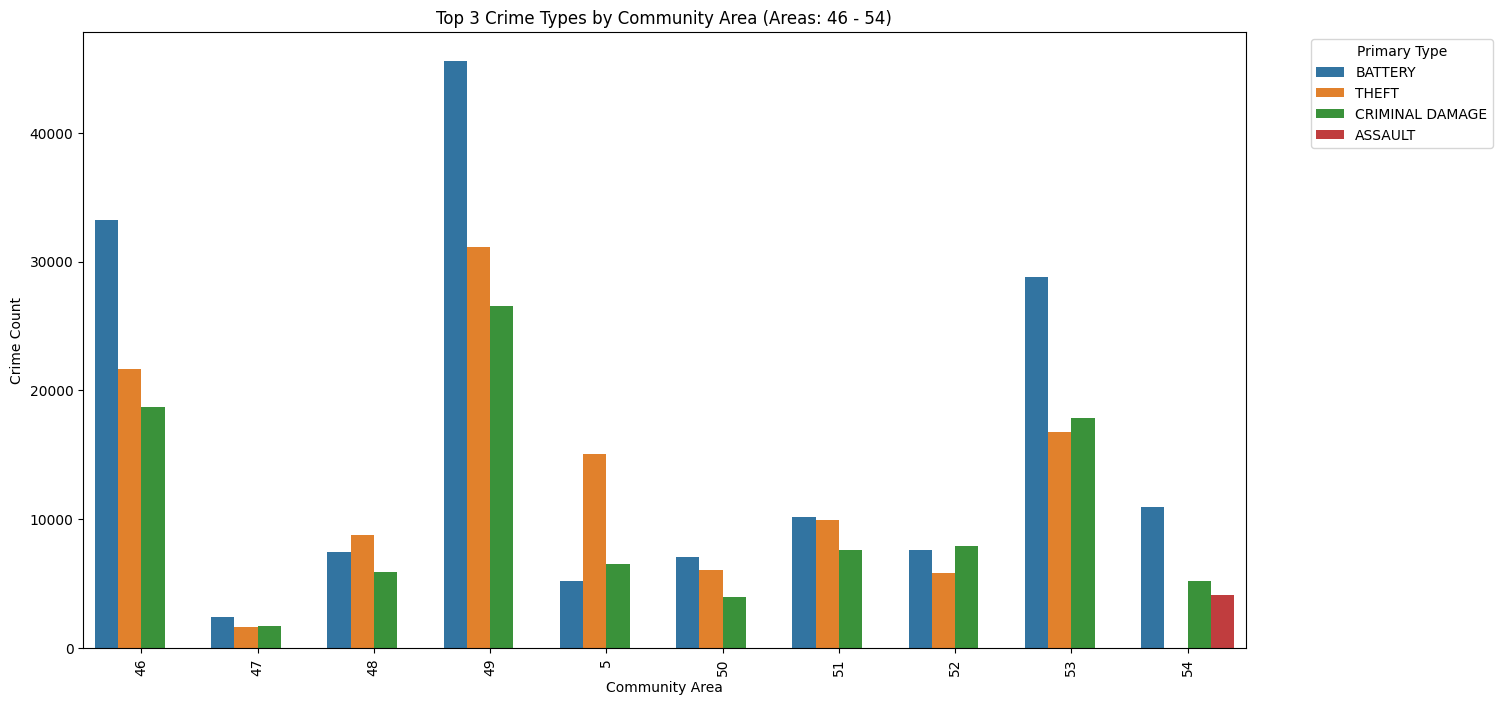

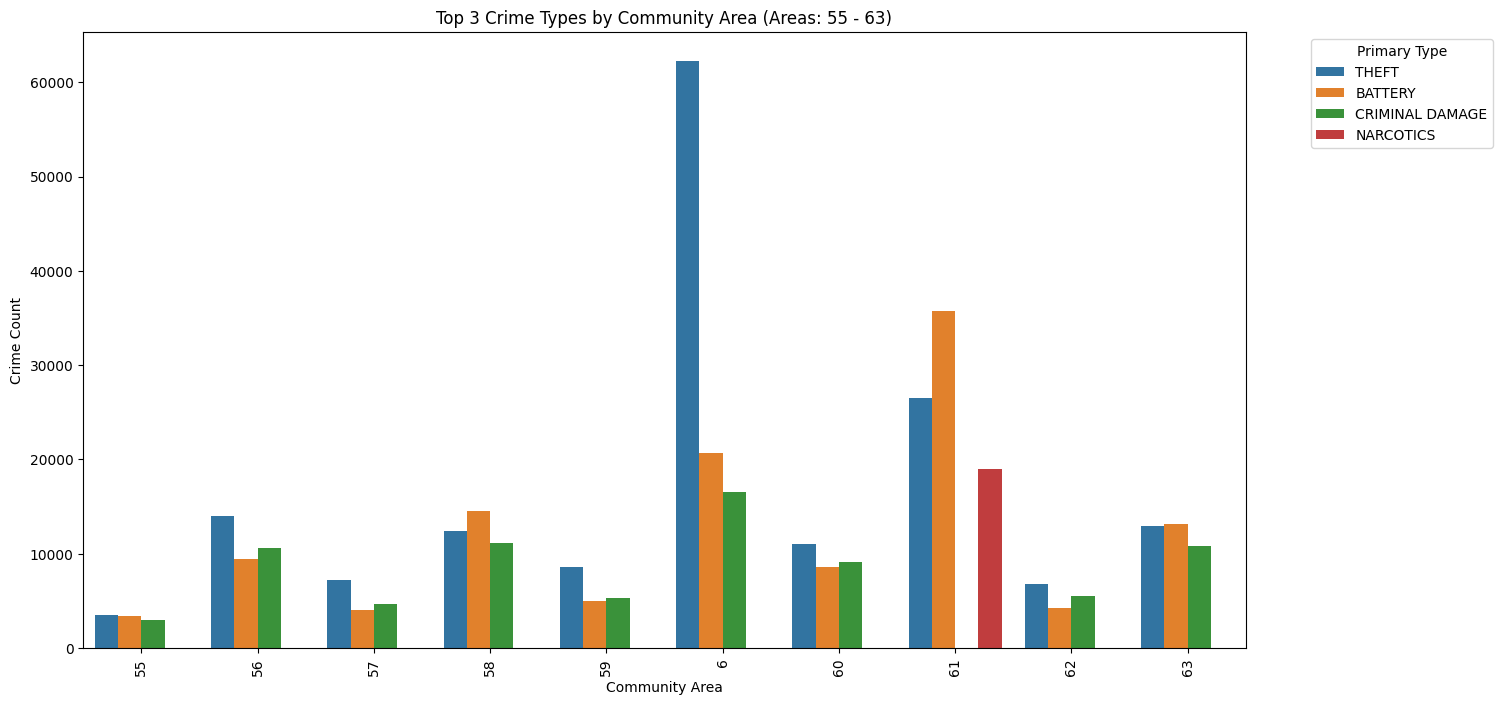

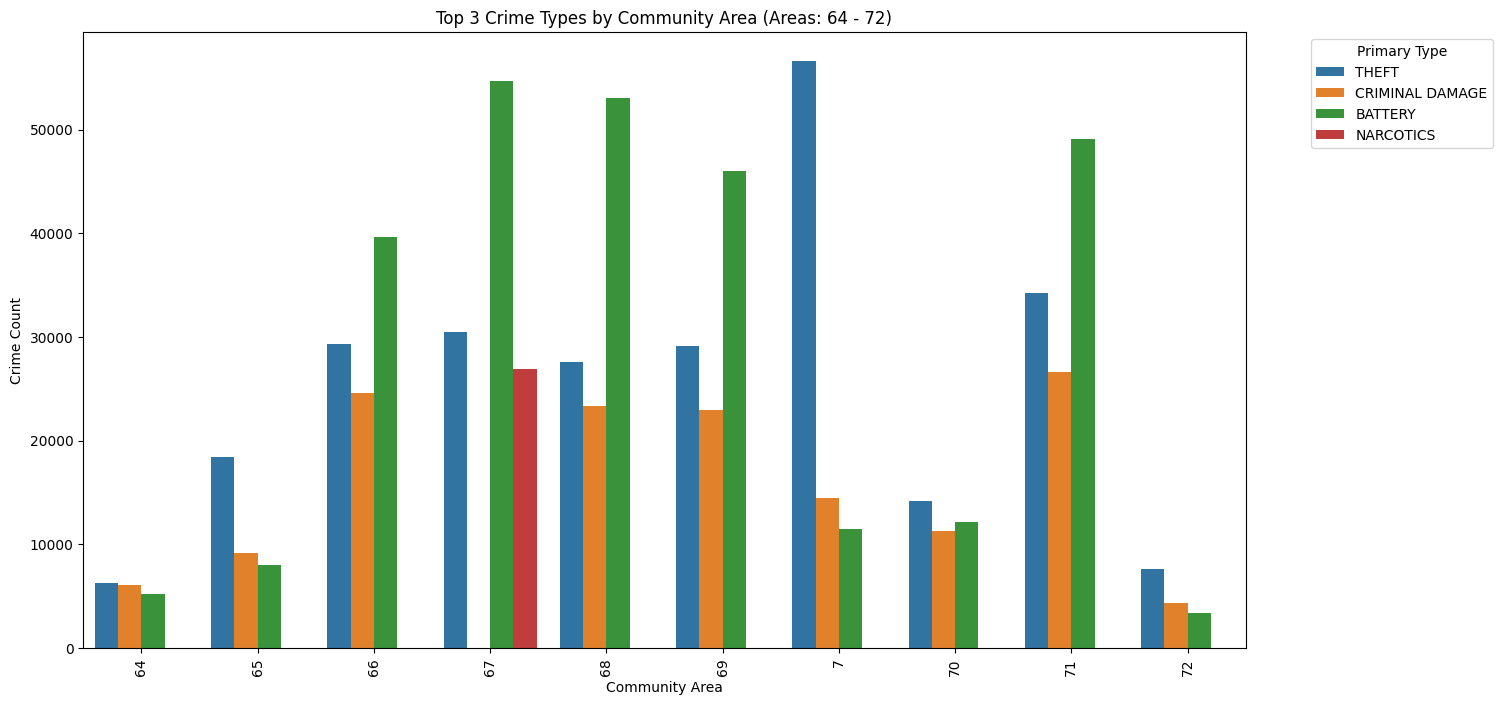

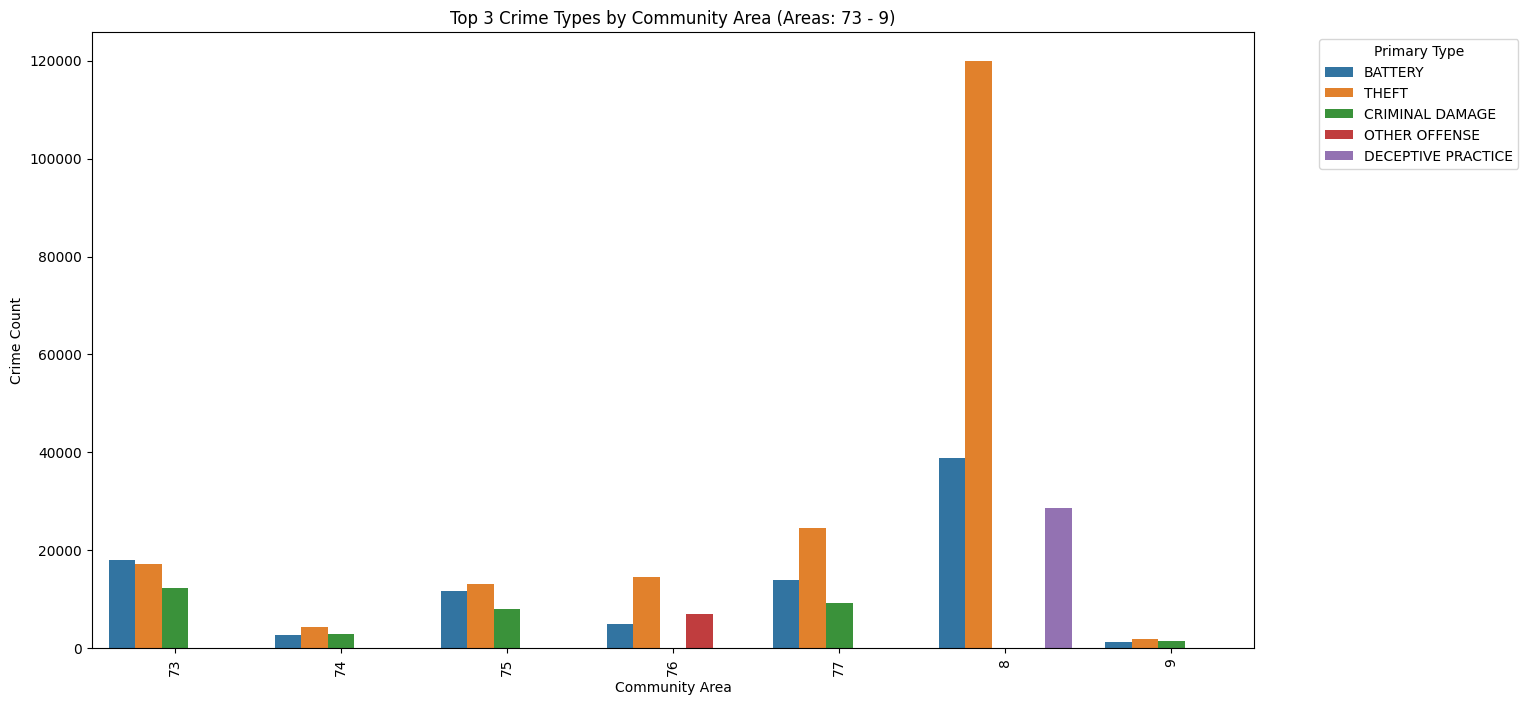

In [115]:
# Community Area 번호 순으로 정렬
top_3_crimes = top_3_crimes.sort_values('Community Area')

# Community Area를 10개씩 나누기
unique_areas = top_3_crimes['Community Area'].unique()
chunks = [unique_areas[i:i+10] for i in range(0, len(unique_areas), 10)]

# 각 그룹(10개씩)에 대해 그래프 그리기
for chunk in chunks:
    plt.figure(figsize=(15, 8))
    subset = top_3_crimes[top_3_crimes['Community Area'].isin(chunk)]
    sns.barplot(x='Community Area', y='Crime Count', hue='Primary Type', data=subset)

    # 범례를 그래프 바깥으로 이동
    plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=90)  # x축 라벨 회전
    plt.title(f'Top 3 Crime Types by Community Area (Areas: {chunk[0]} - {chunk[-1]})')
    plt.xlabel('Community Area')
    plt.ylabel('Crime Count')

    plt.show()

#### 범죄와 소득간의 관계

In [118]:
import plotly.express as px

# Scatter plot 생성 (hover_data에 Community Area 추가)
fig = px.scatter(
    merge_crime_by_area,
    x='income',
    y='Crime Rate',
    hover_data=['Community Area'],  # 마우스 오버 시 Community Area 표시
    title='Crime Rate vs Income by Community Area',
    labels={'income': 'Income', 'Crime Rate': 'Crime Rate'}
)

fig.show()


-> 소득수준이 올라갈 수록 범죄율이 감소<br>
이상치: Community Area 32번 'Loop'지역이 income이 평균 이상인데 비해 범죄율 높음

In [121]:
c_name[c_name['Community Area'] == '32']

,Community Area,name,population,income,requests,latinos,blacks,white,asian,other
31,32,Loop,29283,78124,3223.030427,0.069,0.115,0.627,0.159,0.031


#### Loop(32) 지역 분석

In [140]:
# 'Loop' 지역만 필터링하여 범죄 유형 분석
loop_data = chicago[chicago['Community Area'] == '32']

# 'Loop' 지역의 범죄 유형 분포
loop_crime_by_type = loop_data['Primary Type'].value_counts()

# 다른 지역들의 범죄 유형 분포
other_areas_data = chicago[chicago['Community Area'] != 32]
other_crime_by_type = other_areas_data['Primary Type'].value_counts()

# 결과 출력
print("Loop Area Crime Types:")
print(loop_crime_by_type)

# 결과 출력
print("27 Area Crime Types:")
print(loop_crime_by_type)

print("\nOther Areas Crime Types:")
print(other_crime_by_type)

Loop Area Crime Types:
Primary Type
THEFT                                102584
DECEPTIVE PRACTICE                    23827
BATTERY                               19057
CRIMINAL DAMAGE                       10390
CRIMINAL TRESPASS                      9154
ASSAULT                                9113
OTHER OFFENSE                          8373
ROBBERY                                5704
NARCOTICS                              4473
MOTOR VEHICLE THEFT                    4392
BURGLARY                               2999
PUBLIC PEACE VIOLATION                 1825
WEAPONS VIOLATION                       851
SEX OFFENSE                             827
PROSTITUTION                            562
INTERFERENCE WITH PUBLIC OFFICER        366
CRIM SEXUAL ASSAULT                     325
LIQUOR LAW VIOLATION                    312
CRIMINAL SEXUAL ASSAULT                 253
OFFENSE INVOLVING CHILDREN              208
INTIMIDATION                            170
STALKING                                



'Loop' 지역은 고소득 지역이지만 범죄율이 다른 지역들과 다르게 나타나는 특성을 보인다. <br>
이 지역은 상업지구로서의 특성, 높은 유동인구, 특정 범죄 유형 등이 영향을 미쳤을 가능성이 있음

#### 클러스터링

Crime Count(범죄 건수)와 Crime Rate(범죄율)을 기준으로 3개 군집

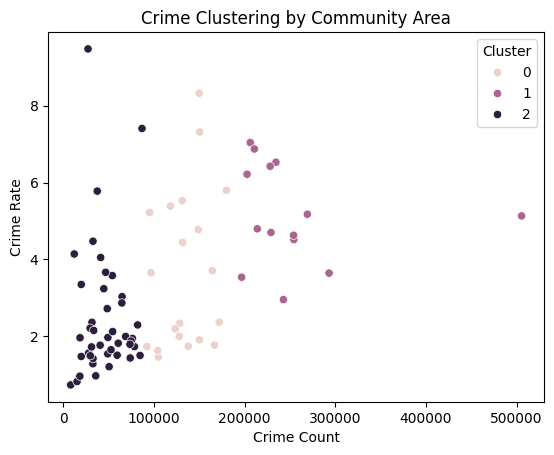

In [123]:
from sklearn.cluster import KMeans
crime_features = merge_crime_by_area[['Crime Count', 'Crime Rate']]  # 예시로 범죄 건수와 범죄율
kmeans = KMeans(n_clusters=3)
merge_crime_by_area['Cluster'] = kmeans.fit_predict(crime_features)
sns.scatterplot(x='Crime Count', y='Crime Rate', hue='Cluster', data=merge_crime_by_area)
plt.title('Crime Clustering by Community Area')
plt.show()

- Cluster 0 (중간 범죄율 & 중간 범죄 건수) → 일반적인 수준의 지역

- Cluster 1 (높은 범죄율 & 높은 범죄 건수) → 위험 지역

- Cluster 2 (낮은 범죄율 & 낮은 범죄 건수) → 비교적 안전한 지역

In [127]:
# 클러스터별 Community Area 목록
cluster_areas = merge_crime_by_area.groupby('Cluster')['Community Area'].apply(list).reset_index()
cluster_areas

,Cluster,Community Area
0,0,"[1, 2, 3, 6, 7, 15, 16, 19, 22, 26, 27, 30, 35..."
1,1,"[8, 23, 24, 25, 28, 29, 32, 43, 49, 66, 67, 68..."
2,2,"[4, 5, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, ..."


Far North Side = 76, 9, 10, 11, 12, 13, 14, 2, 4, 1, 77, 3<br>
North West Side = 15, 16, 17 , 18, 19, 20<br>
North Side = 5, 6, 7, 21, 22<br>
West Side = 23, 24, 25, 26, 27, 28, 29, 30, 31<br>
Central = 8, 32, 33<br>
South West Side = 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68<br>
South Side = 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 60, 69<br>
Far South West Side = 70, 71, 72, 73, 74, 75<br>
Far South East Side = 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55

### 시카고 범죄 데이터에 시카고 데이터(인구 소득) 및 지역정보 병합

In [143]:
chicago['Community Area'] = chicago['Community Area'].astype(int)
chicago['Community Area'] = chicago['Community Area'].astype(str)
c_name['Community Area'] = c_name['Community Area'].astype(str)

merge = pd.merge(chicago, c_name, how='left', on='Community Area')
merge.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time', 'Hour',
       'Weekday', 'Month', 'name', 'population', 'income', 'requests',
       'latinos', 'blacks', 'white', 'asian', 'other'],
      dtype='object')

In [144]:
# 지역 매핑 딕셔너리
region_mapping = {
    "Far North Side": ['76', '9', '10', '11', '12', '13', '14', '2', '4', '1', '77', '3'],
    "North West Side": ['15', '16', '17', '18', '19', '20'],
    "North Side": ['5', '6', '7', '21', '22'],
    "West Side": ['23', '24', '25', '26', '27', '28', '29', '30', '31'],
    "Central": ['8', '32', '33'],
    "South West Side": ['56', '57', '58', '59', '61', '62', '63', '64', '65', '66', '67', '68'],
    "South Side": ['34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '60', '69'],
    "Far South West Side": ['70', '71', '72', '73', '74', '75'],
    "Far South East Side": ['44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55']
}

# region 컬럼 매핑 함수
def get_region(community_area):
    for region, areas in region_mapping.items():
        if community_area in areas:
            return region
    return "Unknown"  # 매칭되지 않는 경우

# 네 데이터프레임(merge)에 적용
merge['region'] = merge['Community Area'].apply(get_region)

# 결과 확인
print(merge[['Community Area', 'region']].head())  # 상위 5개 행 출력

  Community Area               region
0             49  Far South East Side
1             49  Far South East Side
2             53  Far South East Side
3             11       Far North Side
4             71  Far South West Side


In [146]:
merge.to_csv('/content/drive/MyDrive/final_csv/chicago_final.csv')

In [147]:
merge.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,name,population,income,requests,latinos,blacks,white,asian,other,region
0,6255892,HP342049,2008-05-17 18:00:00,101XX S LAFAYETTE AVE,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,Roseland,44619,40142,6717.765974,0.010,0.974,0.004,0.001,0.011,Far South East Side
1,6272641,HP358387,2008-05-27 01:00:00,105XX S PERRY AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,...,Roseland,44619,40142,6717.765974,0.010,0.974,0.004,0.001,0.011,Far South East Side
2,6438609,HP496499,2008-08-05 22:37:00,126XX S UNION AVE,031A,ROBBERY,ARMED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,West Pullman,29651,39601,6947.151867,0.051,0.931,0.006,0.000,0.012,Far South East Side
3,6680276,HP754070,2008-12-27 20:00:00,058XX N MANTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,Jefferson Park,25448,60592,4633.762968,0.194,0.010,0.687,0.089,0.021,Far North Side
4,7823660,HS634379,2010-11-19 09:00:00,076XX S ABERDEEN ST,0320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,Auburn Gresham,48743,34767,5785.446115,0.009,0.978,0.003,0.001,0.009,Far South West Side
